In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

from survae.data import *
from survae.layer import *
from survae.plot import *
from survae.train import *

In [2]:
default_model_generators = [
    lambda c: SurVAE(
        [
            [BijectiveLayer(2, [64] * 5), OrthonormalLayer(2)]
            for _ in range(10)
        ],
        name="NF",
        condition_size=c,
    ),
    lambda c: SurVAE(
        [
            AbsoluteUnit(torch.tensor([1 / 2, 1 / 2])),
        ] + [
            [BijectiveLayer(2, [64] * 5), OrthonormalLayer(2)]
            for _ in range(10)
        ],
        name="NF-abs",
        condition_size=c,
    ),
    lambda c: SurVAE(
        [
            AbsoluteUnit(torch.tensor([1 / 2, 1 / 2]), learn_q=True),
        ] + [
            [BijectiveLayer(2, [64] * 5), OrthonormalLayer(2)]
            for _ in range(10)
        ],
        name="NF-abs-trained",
        condition_size=c,
    )
]

In [3]:
default_datasets = [
    Ngon(name="N-gon"),
    Circles(name="Circles"),
    Corners(name="Corners"),
    Checkerboard(name="Checkerboard"),
]

In [4]:
models = train_models(default_model_generators, default_datasets)

100%|██████████| 12/12 [13:38<00:00, 68.22s/it]


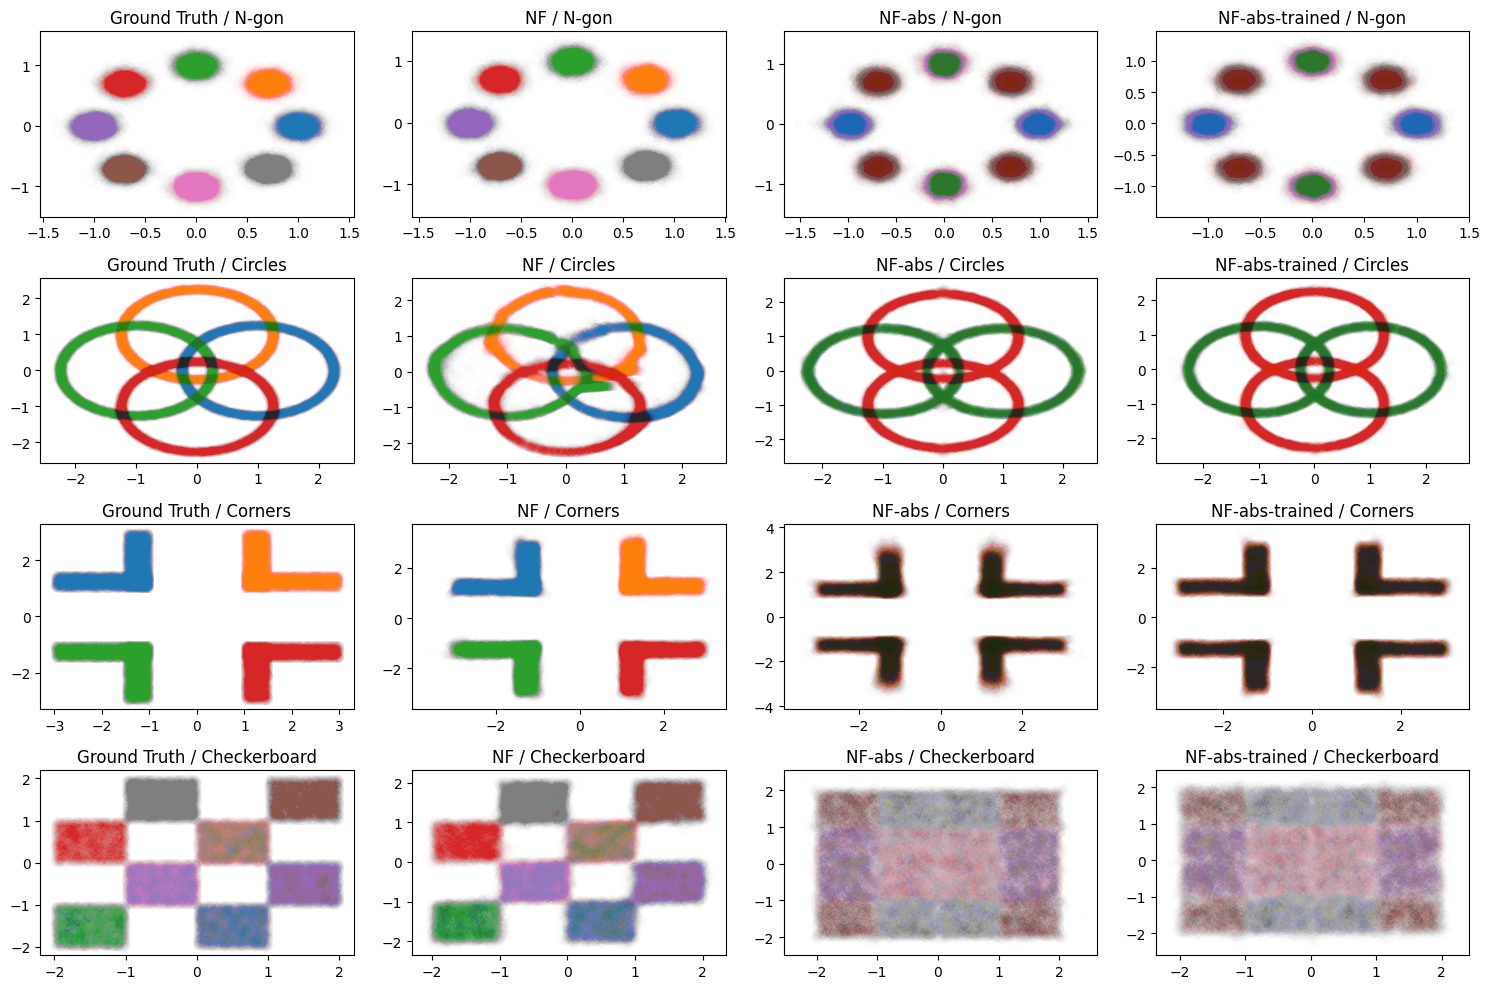

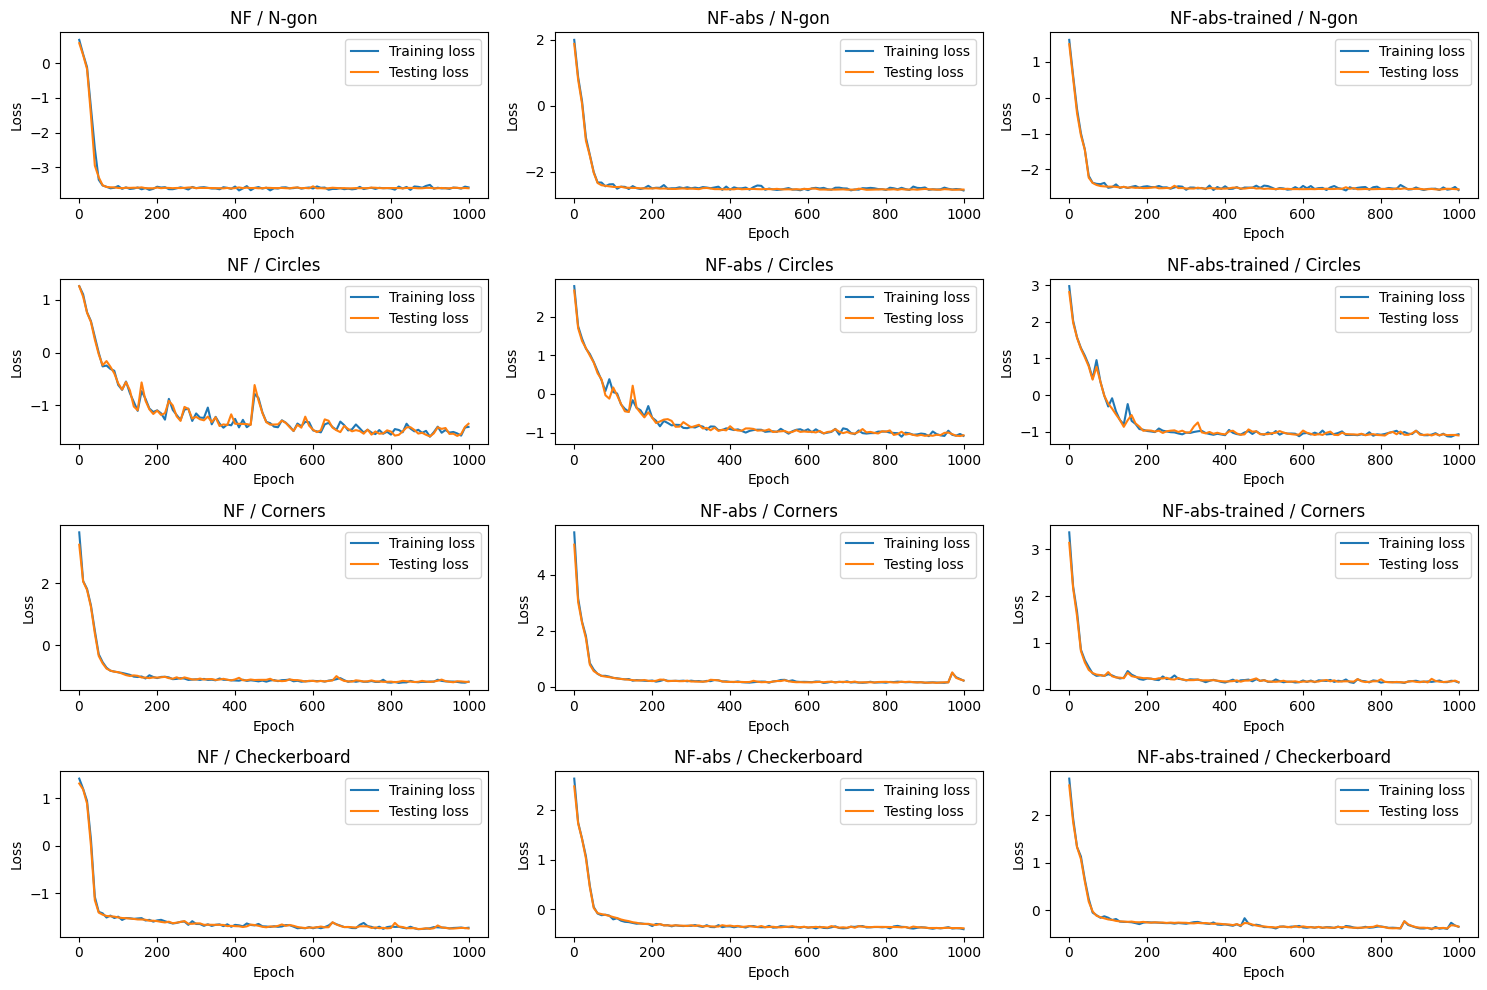

In [7]:
plot(models, default_datasets)

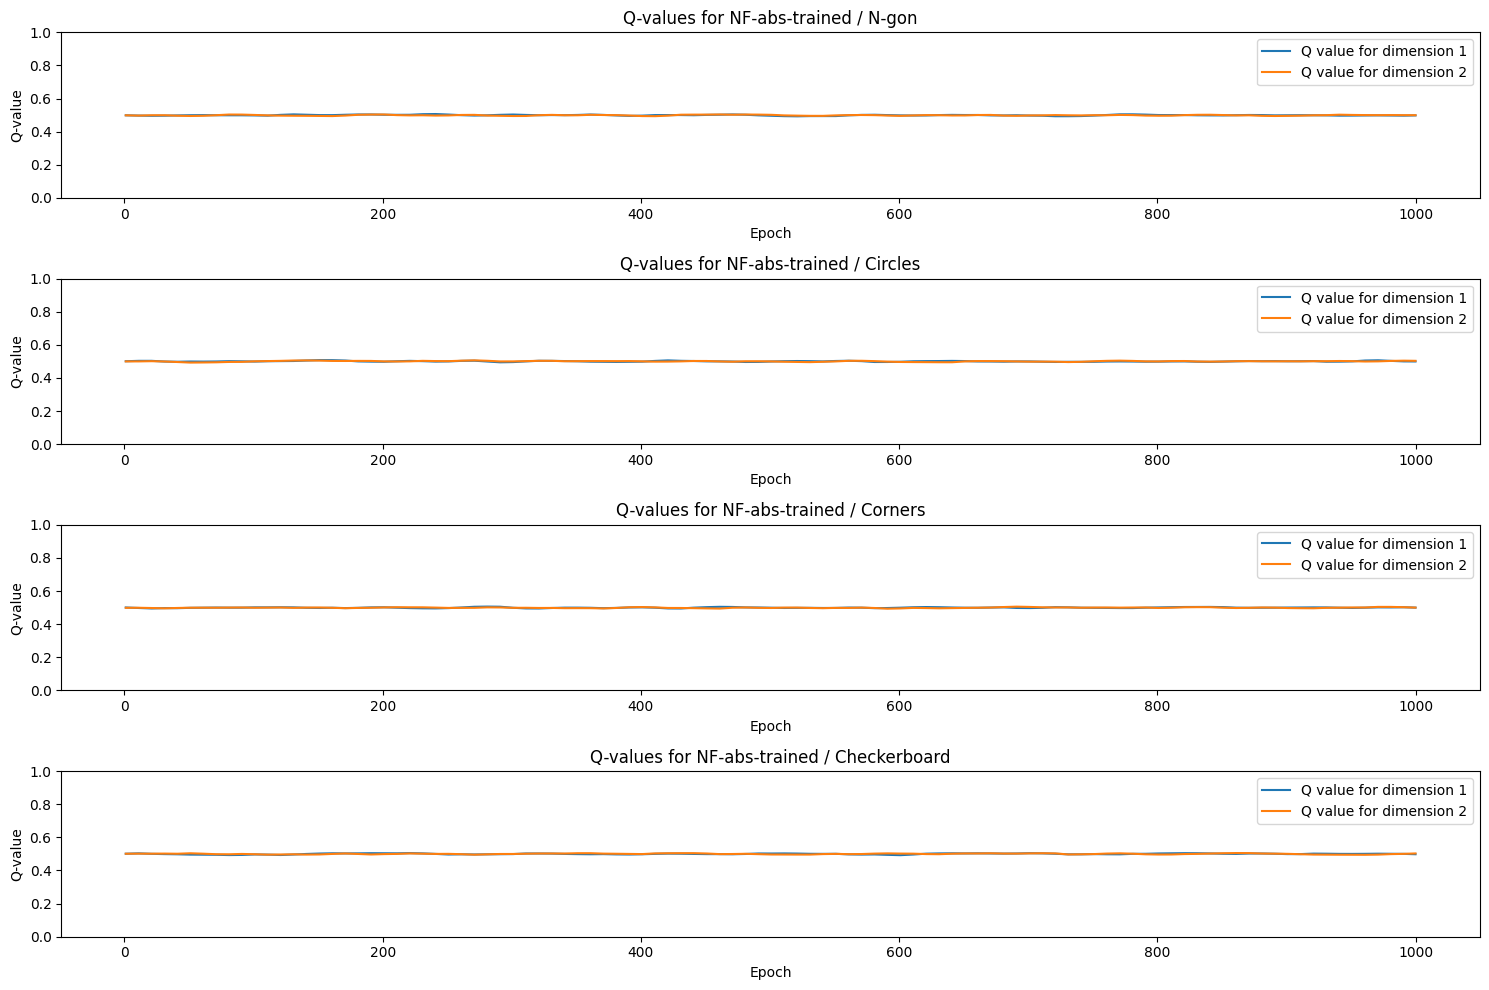

In [8]:
plot_q_values(models, default_datasets)

In [9]:
middle_abs_model_generators = [
    lambda c: SurVAE(
        [
            [BijectiveLayer(2, [64] * 5), OrthonormalLayer(2)]
            for _ in range(10)
        ],
        name="NF",
        condition_size=c,
    ),
    lambda c: SurVAE(
        [
            [BijectiveLayer(2, [64] * 5), OrthonormalLayer(2)]
            for _ in range(5)
        ] + [
            AbsoluteUnit(torch.tensor([1 / 2, 1 / 2])),
        ] + [
            [BijectiveLayer(2, [64] * 5), OrthonormalLayer(2)]
            for _ in range(5)
        ],
        name="NF-middle-abs",
        condition_size=c,
    ),
    lambda c: SurVAE(
        [
            [BijectiveLayer(2, [64] * 5), OrthonormalLayer(2)]
            for _ in range(5)
        ] + [
            AbsoluteUnit(torch.tensor([1 / 2, 1 / 2]), learn_q=True),
        ] + [
            [BijectiveLayer(2, [64] * 5), OrthonormalLayer(2)]
            for _ in range(5)
        ],
        name="NF-middle-abs-trained",
        condition_size=c,
    )
]


In [10]:
models = train_models(middle_abs_model_generators, default_datasets)

100%|██████████| 12/12 [13:55<00:00, 69.65s/it]


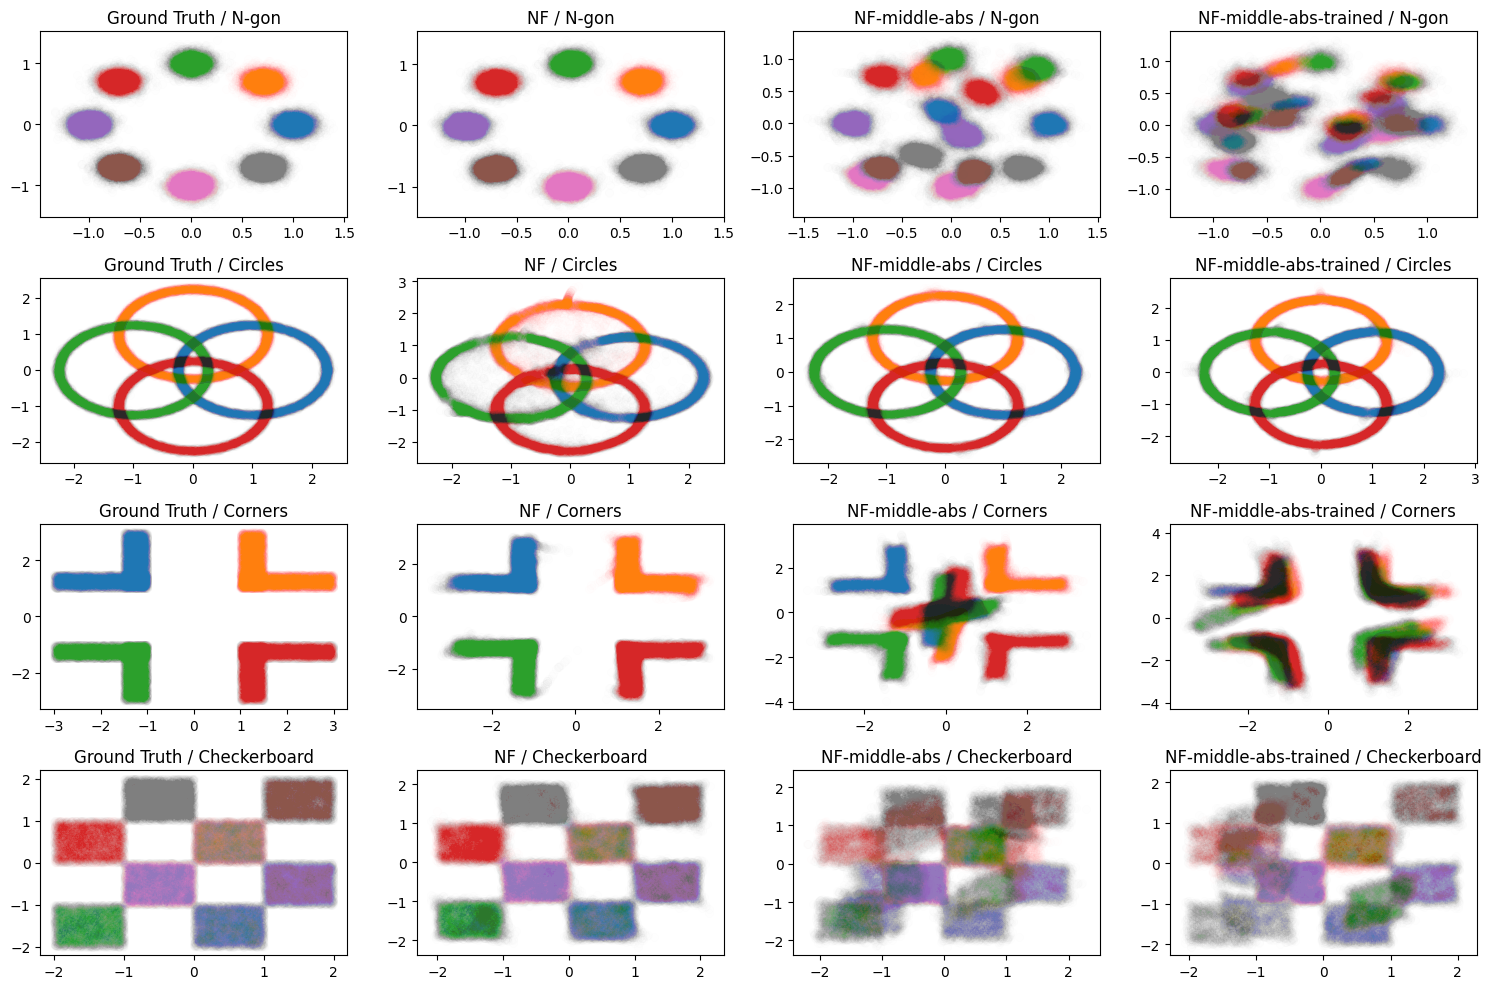

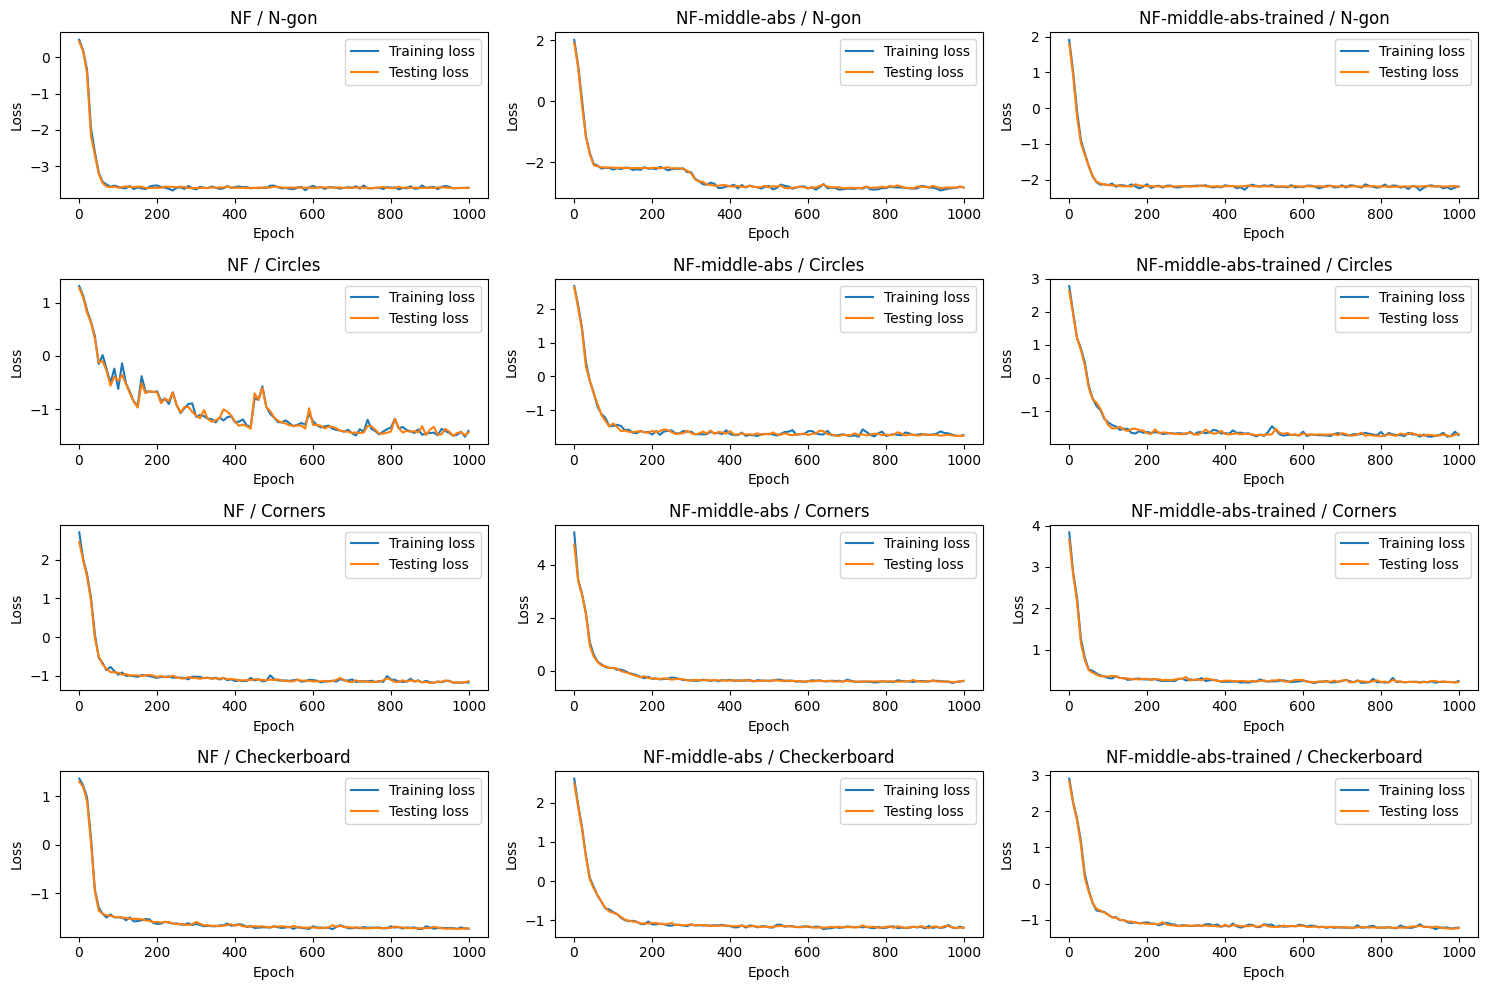

In [11]:
plot(models, default_datasets)